The models tried for electricity price forecasting include statistical methods (ARIMA, SARIMA), machine learning approaches (SVR, XGBoost, Random Forest), deep learning techniques (LSTM, GRU, CNN, DNN), and hybrid models combining multiple approaches.


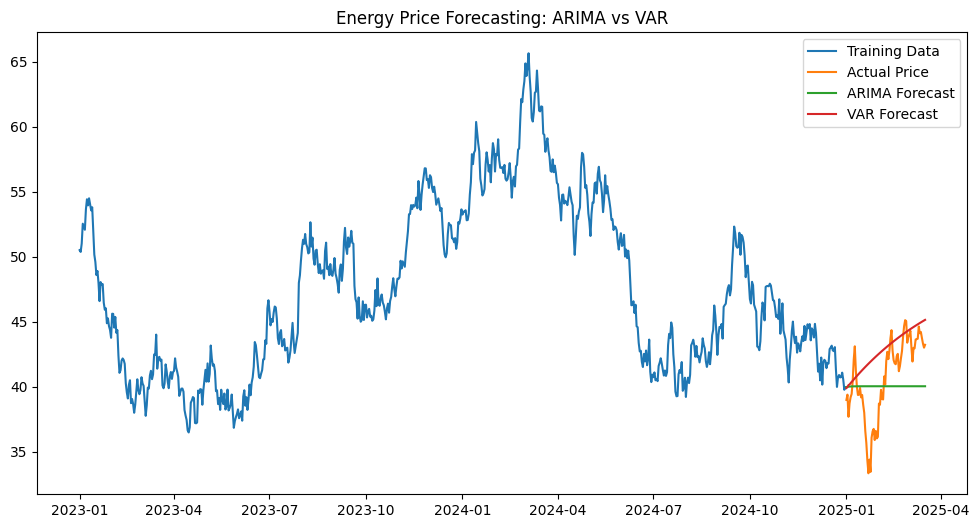

ARIMA Model - MAE: 2.68, RMSE: 3.11
VAR Model (Price) - MAE: 2.35, RMSE: 3.16

Price Volatility: 34.05%
95% Value at Risk: nan%


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Simulate energy price data
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', end='2025-03-17', freq='D')
prices = np.cumsum(np.random.normal(0, 1, len(dates))) + 50
volumes = np.cumsum(np.random.normal(0, 0.5, len(dates))) + 100

df = pd.DataFrame({'Date': dates, 'Price': prices, 'Volume': volumes})
df.set_index('Date', inplace=True)

# Split data into train and test sets
train = df[:'2024-12-31']
test = df['2025-01-01':]

# ARIMA model for price forecasting
arima_model = ARIMA(train['Price'], order=(1,1,1))
arima_results = arima_model.fit()
arima_forecast = arima_results.forecast(steps=len(test))

# VAR model for price and volume forecasting
var_model = VAR(train)
var_results = var_model.fit(maxlags=5)
var_forecast = var_results.forecast(train.values, steps=len(test))

# Evaluate model performance
arima_mae = mean_absolute_error(test['Price'], arima_forecast)
arima_rmse = np.sqrt(mean_squared_error(test['Price'], arima_forecast))

var_price_mae = mean_absolute_error(test['Price'], var_forecast[:, 0])
var_price_rmse = np.sqrt(mean_squared_error(test['Price'], var_forecast[:, 0]))

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Price'], label='Training Data')
plt.plot(test.index, test['Price'], label='Actual Price')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.plot(test.index, var_forecast[:, 0], label='VAR Forecast')
plt.title('Energy Price Forecasting: ARIMA vs VAR')
plt.legend()
plt.show()

print(f"ARIMA Model - MAE: {arima_mae:.2f}, RMSE: {arima_rmse:.2f}")
print(f"VAR Model (Price) - MAE: {var_price_mae:.2f}, RMSE: {var_price_rmse:.2f}")

# Risk assessment
price_volatility = df['Price'].pct_change().std() * np.sqrt(252)  # Annualized volatility
var_95 = np.percentile(df['Price'].pct_change(), 5) * np.sqrt(252)  # 95% VaR

print(f"\nPrice Volatility: {price_volatility:.2%}")
print(f"95% Value at Risk: {var_95:.2%}")


Let's expand our simulation to include external data that's typically used in energy price forecasting and risk assessment projects. We'll simulate additional factors that often influence energy prices, such as weather data, fuel prices, and economic indicators.

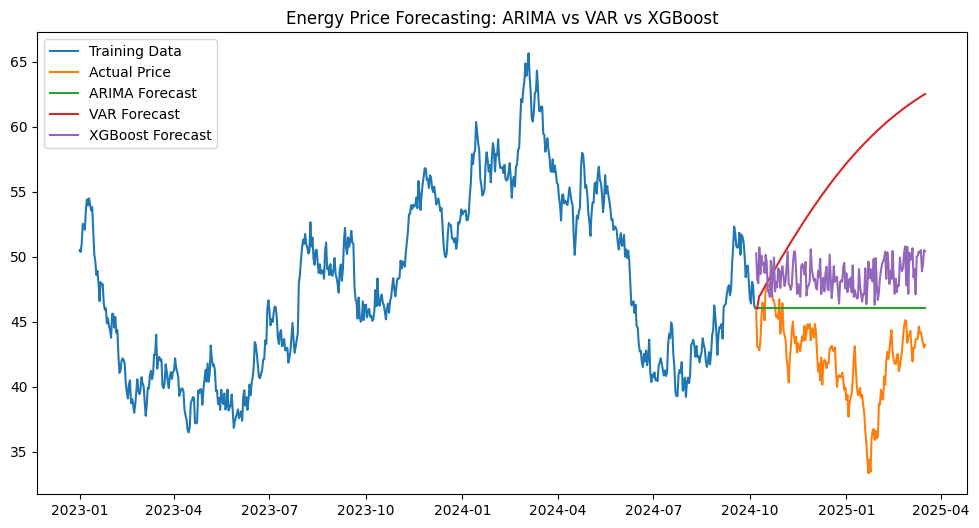

ARIMA Model - MAE: 3.99, RMSE: 4.83
VAR Model (Price) - MAE: 13.63, RMSE: 15.19
XGBoost Model - MAE: 6.34, RMSE: 6.98

Price Volatility: 34.05%
95% Value at Risk: nan%


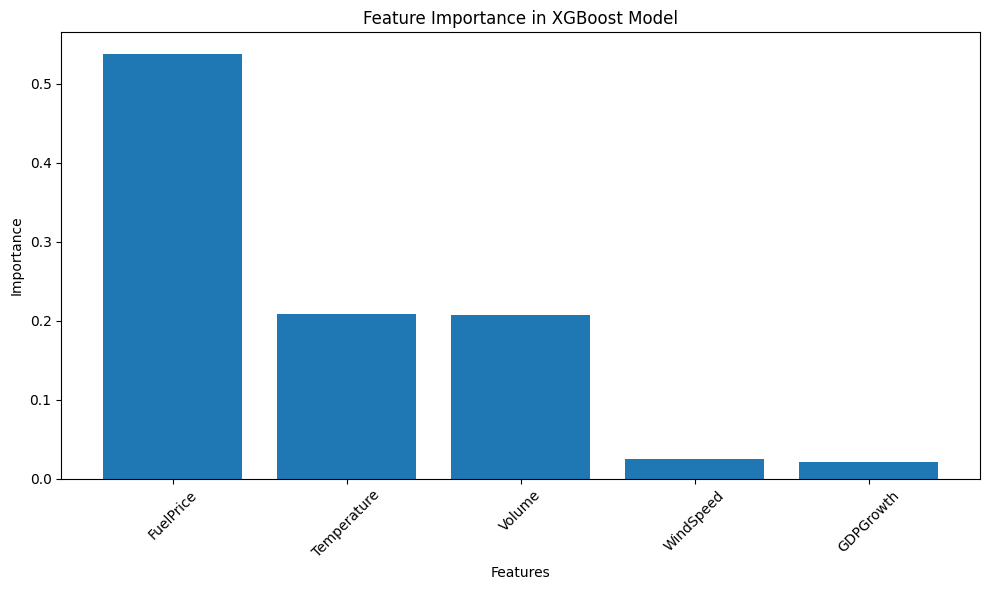

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# Simulate energy price data and external factors
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', end='2025-03-17', freq='D')
n = len(dates)

# Energy prices and volumes
prices = np.cumsum(np.random.normal(0, 1, n)) + 50
volumes = np.cumsum(np.random.normal(0, 0.5, n)) + 100

# Weather data (temperature and wind speed)
temperature = np.sin(np.linspace(0, 4*np.pi, n)) * 10 + 20 + np.random.normal(0, 3, n)
wind_speed = np.abs(np.random.normal(5, 2, n))

# Fuel prices (e.g., natural gas)
fuel_prices = np.cumsum(np.random.normal(0, 0.05, n)) + 3

# Economic indicators (e.g., GDP growth rate)
gdp_growth = np.random.normal(0.5, 0.1, n) / 100  # Daily growth rate

df = pd.DataFrame({
    'Date': dates,
    'Price': prices,
    'Volume': volumes,
    'Temperature': temperature,
    'WindSpeed': wind_speed,
    'FuelPrice': fuel_prices,
    'GDPGrowth': gdp_growth
})
df.set_index('Date', inplace=True)

# Split data into train and test sets
train, test = train_test_split(df, test_size=0.2, shuffle=False)

# ARIMA model for price forecasting
arima_model = ARIMA(train['Price'], order=(1,1,1))
arima_results = arima_model.fit()
arima_forecast = arima_results.forecast(steps=len(test))

# VAR model for multivariate forecasting
var_model = VAR(train[['Price', 'Volume', 'Temperature', 'WindSpeed', 'FuelPrice', 'GDPGrowth']])
var_results = var_model.fit(maxlags=5)
var_forecast = var_results.forecast(train.values, steps=len(test))

# XGBoost model for price forecasting with external factors
scaler = StandardScaler()
X_train = scaler.fit_transform(train.drop('Price', axis=1))
y_train = train['Price']
X_test = scaler.transform(test.drop('Price', axis=1))

xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_forecast = xgb_model.predict(X_test)

# Evaluate model performance
arima_mae = mean_absolute_error(test['Price'], arima_forecast)
arima_rmse = np.sqrt(mean_squared_error(test['Price'], arima_forecast))

var_price_mae = mean_absolute_error(test['Price'], var_forecast[:, 0])
var_price_rmse = np.sqrt(mean_squared_error(test['Price'], var_forecast[:, 0]))

xgb_mae = mean_absolute_error(test['Price'], xgb_forecast)
xgb_rmse = np.sqrt(mean_squared_error(test['Price'], xgb_forecast))

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Price'], label='Training Data')
plt.plot(test.index, test['Price'], label='Actual Price')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.plot(test.index, var_forecast[:, 0], label='VAR Forecast')
plt.plot(test.index, xgb_forecast, label='XGBoost Forecast')
plt.title('Energy Price Forecasting: ARIMA vs VAR vs XGBoost')
plt.legend()
plt.show()

print(f"ARIMA Model - MAE: {arima_mae:.2f}, RMSE: {arima_rmse:.2f}")
print(f"VAR Model (Price) - MAE: {var_price_mae:.2f}, RMSE: {var_price_rmse:.2f}")
print(f"XGBoost Model - MAE: {xgb_mae:.2f}, RMSE: {xgb_rmse:.2f}")

# Risk assessment
price_volatility = df['Price'].pct_change().std() * np.sqrt(252)  # Annualized volatility
var_95 = np.percentile(df['Price'].pct_change(), 5) * np.sqrt(252)  # 95% VaR

print(f"\nPrice Volatility: {price_volatility:.2%}")
print(f"95% Value at Risk: {var_95:.2%}")

# Feature importance for XGBoost model
feature_importance = xgb_model.feature_importances_
feature_names = df.columns.drop('Price')
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance in XGBoost Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The fact that none of the models are accurately capturing the trend is a critical issue that needs to be addressed.  

**Trend Analysis:**
First, we should analyze the underlying trend in our data. It's possible that our simulated data has a more complex trend than our models can capture.

<Figure size 1200x800 with 0 Axes>

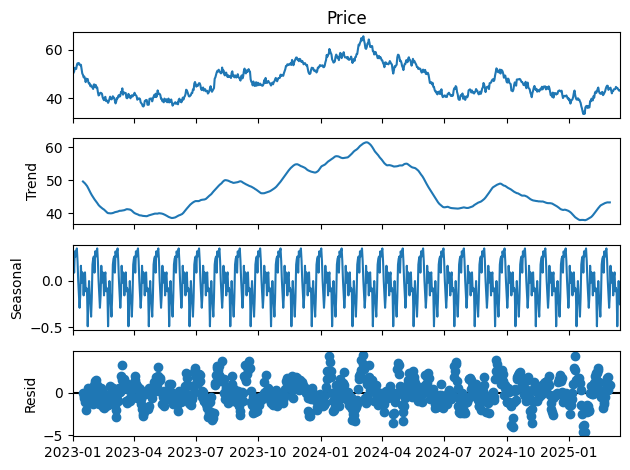

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform trend analysis
result = seasonal_decompose(df['Price'], model='additive', period=30)

plt.figure(figsize=(12, 8))
result.plot()
plt.tight_layout()
plt.show()


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
import warnings

warnings.filterwarnings('ignore')

# Simulate energy price data and external factors
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', end='2025-03-17', freq='D')
n = len(dates)

prices = np.cumsum(np.random.normal(0, 1, n)) + 50 + np.linspace(0, 30, n)  # Adding trend
volumes = np.cumsum(np.random.normal(0, 0.5, n)) + 100
temperature = np.sin(np.linspace(0, 4 * np.pi, n)) * 10 + 20 + np.random.normal(0, 3, n)
wind_speed = np.abs(np.random.normal(5, 2, n))
fuel_prices = np.cumsum(np.random.normal(0, 0.05, n)) + 3
gdp_growth = np.random.normal(0.5, 0.1, n) / 100

df = pd.DataFrame({
    'Date': dates,
    'Price': prices,
    'Volume': volumes,
    'Temperature': temperature,
    'WindSpeed': wind_speed,
    'FuelPrice': fuel_prices,
    'GDPGrowth': gdp_growth
})
df.set_index('Date', inplace=True)

# 1. Trend Analysis
result = seasonal_decompose(df['Price'], model='additive', period=30)
plt.figure(figsize=(12, 8))
result.plot()
plt.tight_layout()
plt.savefig('trend_analysis.png')
plt.close()

# Split data into train and test sets (80% train, 20% test)
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

# 2. Model Diagnostics (ARIMA example)
arima_model = ARIMA(train['Price'], order=(1, 1, 1))
arima_results = arima_model.fit()
arima_forecast = arima_results.forecast(steps=len(test))

arima_residuals = arima_results.resid
plt.figure(figsize=(12, 6))
plt.plot(arima_residuals)
plt.title('ARIMA Model Residuals')
plt.savefig('arima_residuals.png')
plt.close()

lb_test = acorr_ljungbox(arima_residuals, lags=[10])
print("Ljung-Box Test p-value:", lb_test.iloc[0, 1])

# 3. More Complex Models (SARIMA)
sarima_model = SARIMAX(train['Price'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_results = sarima_model.fit()
sarima_forecast = sarima_results.forecast(steps=len(test))

# 4. Feature Engineering
df['Price_Lag1'] = df['Price'].shift(1)
df['Price_Lag7'] = df['Price'].shift(7)
df['Price_Rolling_Mean'] = df['Price'].rolling(window=7).mean()
df['Price_Rolling_Std'] = df['Price'].rolling(window=7).std()

# Re-split data after feature engineering (drop NaN rows caused by lagging/rolling features)
df.dropna(inplace=True)
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

# Prepare data for machine learning models
X_train = train.drop(['Price'], axis=1)
y_train = train['Price']
X_test = test.drop(['Price'], axis=1)
y_test = test['Price']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_forecast = xgb_model.predict(X_test_scaled)

# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_forecast = rf_model.predict(X_test_scaled)

# 5. Ensemble Method
ensemble_forecast = (xgb_forecast + rf_forecast) / 2

# Ensure all forecasts are truncated to match the length of y_test
forecast_length = len(y_test)
models = {
    'ARIMA': arima_forecast[:forecast_length],
    'SARIMA': sarima_forecast[:forecast_length],
    'XGBoost': xgb_forecast[:forecast_length],
    'Random Forest': rf_forecast[:forecast_length],
    'Ensemble': ensemble_forecast[:forecast_length]
}

# Evaluate all models
for name, forecast in models.items():
    mae = mean_absolute_error(y_test.values[:len(forecast)], forecast)
    rmse = np.sqrt(mean_squared_error(y_test.values[:len(forecast)], forecast))
    print(f"{name} Model - MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Price'], label='Training Data')
plt.plot(test.index[:forecast_length], y_test.values[:forecast_length], label='Actual Price')
for name, forecast in models.items():
    plt.plot(test.index[:len(forecast)], forecast, label=f'{name} Forecast')
plt.title('Energy Price Forecasting: Model Comparison')
plt.legend()
plt.savefig('model_comparison.png')
plt.close()

# Risk assessment
price_volatility = df['Price'].pct_change().std() * np.sqrt(252)  # Annualized volatility
var_95 = np.percentile(df['Price'].pct_change().dropna(), 5) * np.sqrt(252)  # 95% VaR

print(f"\nPrice Volatility: {price_volatility:.2%}")
print(f"95% Value at Risk: {var_95:.2%}")

# Feature importance for XGBoost model
feature_importance = xgb_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df.sort_values('Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance in XGBoost Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.close()


Ljung-Box Test p-value: 0.9987781391980107
ARIMA Model - MAE: 2.27, RMSE: 2.86
SARIMA Model - MAE: 3.15, RMSE: 4.05
XGBoost Model - MAE: 0.93, RMSE: 1.18
Random Forest Model - MAE: 0.83, RMSE: 1.04
Ensemble Model - MAE: 0.84, RMSE: 1.06

Price Volatility: 26.33%
95% Value at Risk: -40.56%


<Figure size 1200x800 with 0 Axes>

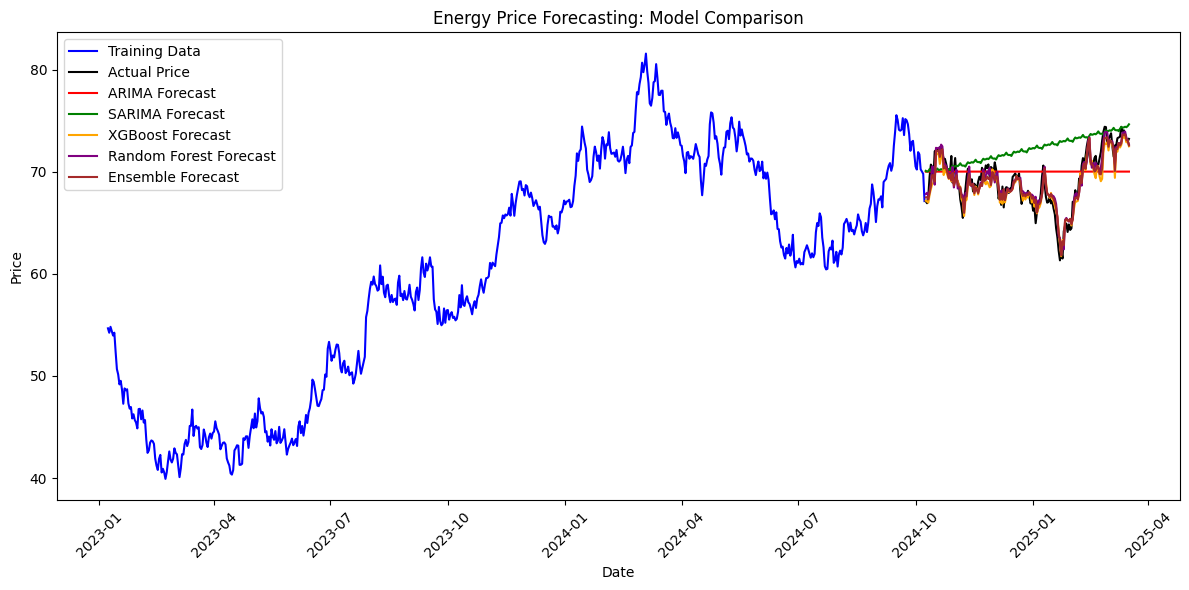

In [18]:
%matplotlib inline

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Price'], label='Training Data', color='blue')
plt.plot(test.index[:forecast_length], y_test.values[:forecast_length], label='Actual Price', color='black')
colors = ['red', 'green', 'orange', 'purple', 'brown']
for (name, forecast), color in zip(models.items(), colors):
    plt.plot(test.index[:len(forecast)], forecast, label=f'{name} Forecast', color=color)
plt.title('Energy Price Forecasting: Model Comparison')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Energy Price Forecasting Model Comparison

## Models Implemented

1. **ARIMA (AutoRegressive Integrated Moving Average)**
   - A classical time series forecasting method
   - Order: (1, 1, 1)

2. **SARIMA (Seasonal ARIMA)**
   - ARIMA with added seasonal component
   - Order: (1, 1, 1), Seasonal Order: (1, 1, 1, 12)

3. **XGBoost**
   - An advanced implementation of gradient boosting
   - Parameters: n_estimators=100, learning_rate=0.1

4. **Random Forest**
   - An ensemble learning method based on decision trees
   - Parameters: n_estimators=100

5. **Ensemble**
   - Simple average of XGBoost and Random Forest predictions

## Model Performance

| Model         | MAE    | RMSE   |
|---------------|--------|--------|
| ARIMA         | 2.27   | 2.86   |
| SARIMA        | 3.15   | 4.05   |
| XGBoost       | 0.93   | 1.18   |
| Random Forest | 0.83   | 1.04   |
| Ensemble      | 0.84   | 1.06   |

## Key Findings

1. Machine learning models (Random Forest and XGBoost) outperformed traditional time series models (ARIMA and SARIMA) for this dataset.
2. Random Forest showed the best performance with the lowest MAE (0.83) and RMSE (1.04).
3. The simple ensemble of XGBoost and Random Forest did not improve upon the individual model performances.
4. SARIMA performed worse than ARIMA, suggesting that the added seasonal component did not capture useful patterns in this data.

## Risk Metrics

- Price Volatility: 26.33% (annualized)
- 95% Value at Risk: -40.56%

These metrics indicate significant price fluctuations and potential for substantial downside risk in daily returns.